#  ------------------------------------------ <u> PROJECT</u> ---------------------------------------------
### PROJECT TITLE : <u>BIGMART SALES PREDICTION ANALYSIS</u>
#### PROJECT DONE BY :
- <u>**KEERTHANA P**<u>

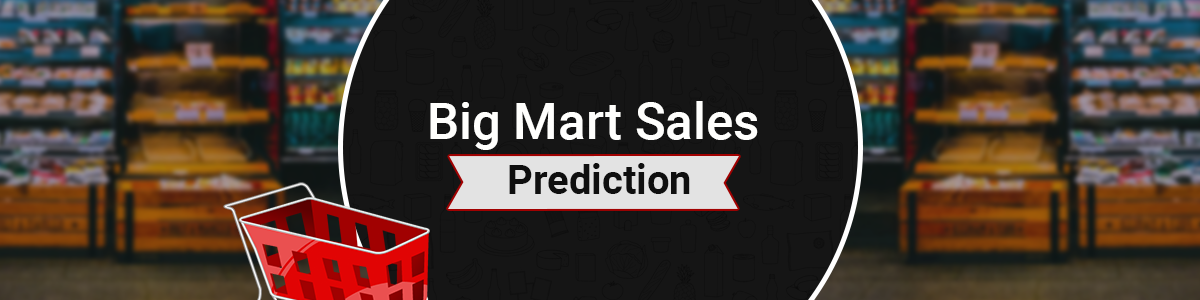

### 1.PROBLEM STATEMENT

The Data Scientists at BigMart collected 2013 sales data for 1559 products across 10 stores in different cities. Certain attributes of each product and store have been defined. The aim is to find out the sales of each product at a particular store and build a predictive model. Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.

### Breakdown of the Problem Statement:
- Supervised machine learning problem.
- **Item_Outlet_Sales** is the target variable which we are going to predict & the remaining are the feature variables

### 2.HYPOTHESIS GENERATION

Following are some of the Hypotheses based on the problem statement:

1- Sales are higher during weekends.

2- Higher sales during morning and late evening.

3- Higher sales during end of the year.

4- Store size affects the sales.

5- Location of the store affects the sales.

6- Items with more shelf space sell more.

### 3.LOADING PACKAGES AND DATA 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")
sns.set
%matplotlib inline

In [2]:
train = pd.read_csv("train.csv")
train.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [3]:
train.shape

(8523, 12)

### 4.DATA STRUCTURE AND CONTENT

In [4]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [5]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


We have two types of data.

1) float64 which are numerical values.

2) object which can be theoritical or categorical

In [7]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


### 5.EXPLORATORY DATA ANALYSIS

In [8]:
# getting categorical and numerical columns
cat_cols = train.select_dtypes(exclude='number').columns.to_list()
num_cols = train.select_dtypes(include='number').columns.to_list()
print('Categorical Columns: ', cat_cols)
print('\n')
print('Numerical Columns: ', num_cols)

Categorical Columns:  ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']


Numerical Columns:  ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']


In [9]:
# exploring categories
for col in cat_cols:
    print('-----------------------------')
    print('Series: ', col)
    print('-----------------------------')
    print(train[col].value_counts())
    print('\n')

-----------------------------
Series:  Item_Identifier
-----------------------------
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64


-----------------------------
Series:  Item_Fat_Content
-----------------------------
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


-----------------------------
Series:  Item_Type
-----------------------------
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 1

Notes:
The dataset 8523 contains datapoints (rows) and 12 features (columns).
The dataset is for 1559 items in 10 different stores.
There are present categorical (object) and numerical features (float, int).

The target is the **_'Item_OutletSales'** feature.
Some features presents null values and outliers.
There are no duplicate rows.

**_ItemIdentifier:**

Ids for 1559 different items.
The ids has some prefixes: FD=Food, DR=Drink, NC=Non-Consumable.

**_ItemWeight:**

It contains null values.

**_Item_FatContent:**

It has 5 different categories, but some of them do reference to an existing category, it can be summarized to two categories: Low Fat and Regular.
This feature do not apply to Non-Consumable items, a new category for them can be created.

**_ItemVisibility:**

Some values are 0%, an item can not be bought by a consumer if its not visible, this is an outlier.

**_ItemType:**

There are 16 different item types, the data is not well distributed among all of them.
The model can be biased towards the most repetitive types: Fruits and Vegetables and Snack Foods.

**_OutletIdentifier:**

There are 10 different outlet ids.
The data seems to be pretty well distributed among all the outlets.

**_OutletSize:**

It has null values.
The data is not well distributed among the different sizes.
The _OuletSize has some relation with the _OuletType that need to be considered when the null values be filled.

**_Outlet_Location_Type and OutletType:**

The data is not well distributed among the different sizes.
The model can be biased towards the most repetitive types.

In [10]:
# Checking for null values
train.isnull().any()

Item_Identifier              False
Item_Weight                   True
Item_Fat_Content             False
Item_Visibility              False
Item_Type                    False
Item_MRP                     False
Outlet_Identifier            False
Outlet_Establishment_Year    False
Outlet_Size                   True
Outlet_Location_Type         False
Outlet_Type                  False
Item_Outlet_Sales            False
dtype: bool

In [11]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

- We have 1463 missing values in Item_Wight and 2410 missing values in Outlet_Size.

### ANALYZE AND VISUALIZE THE DATA

array([[<AxesSubplot:title={'center':'Item_Weight'}>,
        <AxesSubplot:title={'center':'Item_Visibility'}>],
       [<AxesSubplot:title={'center':'Item_MRP'}>,
        <AxesSubplot:title={'center':'Outlet_Establishment_Year'}>],
       [<AxesSubplot:title={'center':'Item_Outlet_Sales'}>,
        <AxesSubplot:>]], dtype=object)

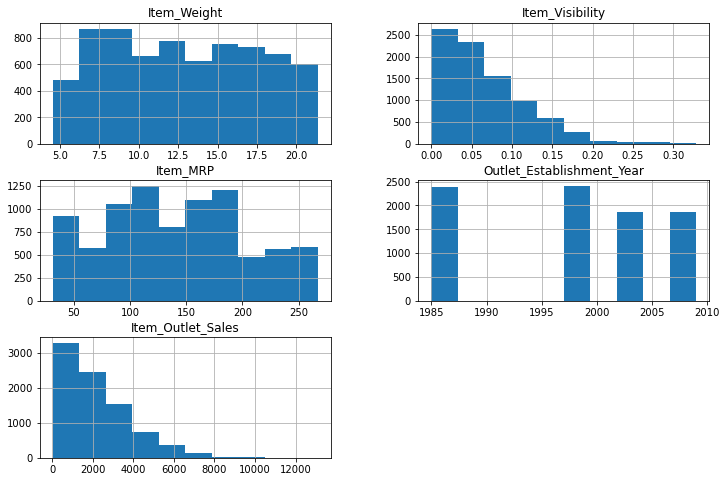

In [12]:
# data distribution of numerical values
train.hist(figsize=(12,8))

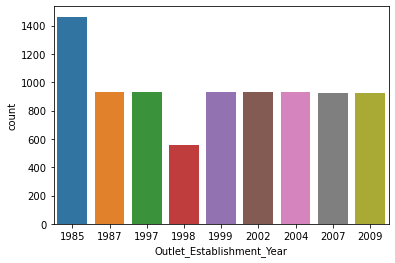

In [13]:
# Outlet_Establishment_Year column
#plt.figure(figsize=(5,5))
sns.countplot(x='Outlet_Establishment_Year', data=train)
plt.show()

# plot correlations
import seaborn as sns
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

In [14]:
duplicate=train.duplicated()
duplicate.sum()

0

No duplicates found in our dataset.

### 6.UNIVARIATE ANALYSIS

array([[<AxesSubplot:title={'center':'Item_Outlet_Sales'}>]], dtype=object)

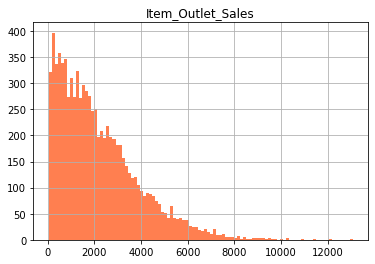

In [15]:
train.hist(column='Item_Outlet_Sales', bins=100, color='coral')

<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

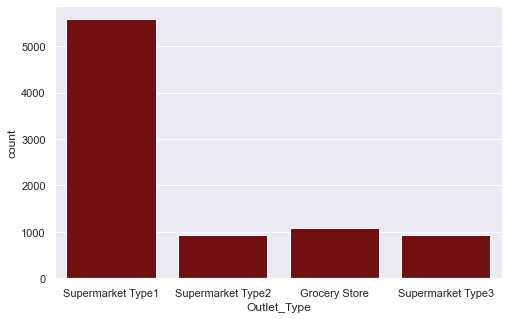

In [16]:
sns.set(rc={'figure.figsize':(8,5)})
sns.countplot(x='Outlet_Type', data=train, color='maroon')

### 7.BIVARIATE ANALYSIS

We find the dependent and independent variables in the dataset.

In [17]:
train.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


Text(0.5, 1.0, 'Relation b/w Item Weight & its Sales at Outlets')

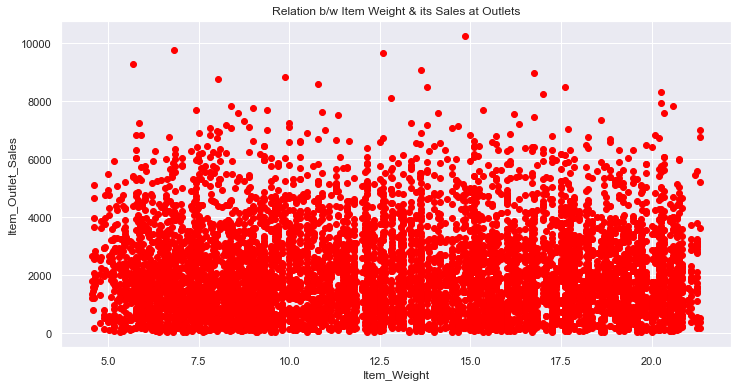

In [18]:
plt.figure(figsize=(12,6))
plt.scatter(train.Item_Weight,train.Item_Outlet_Sales, color='red')
plt.xlabel('Item_Weight')
plt.ylabel('Item_Outlet_Sales')
plt.title('Relation b/w Item Weight & its Sales at Outlets')

There is strong relationship b/w these two columns

Text(0.5, 1.0, 'Relationship b/w Item Visibility & Sales at outlets')

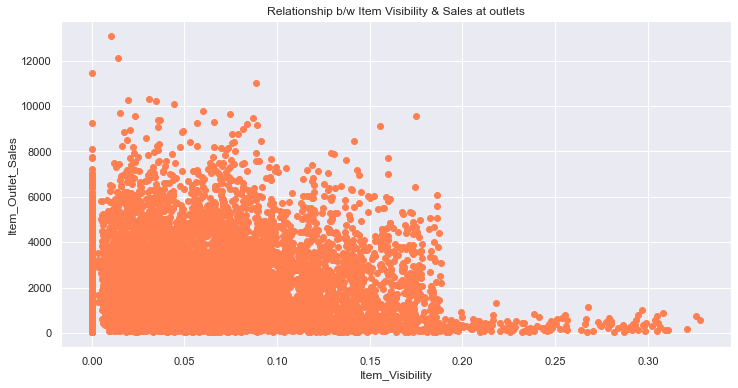

In [19]:
plt.figure(figsize=(12,6))
plt.scatter(train.Item_Visibility,train.Item_Outlet_Sales, color='Coral')
plt.xlabel('Item_Visibility')
plt.ylabel('Item_Outlet_Sales')
plt.title('Relationship b/w Item Visibility & Sales at outlets')

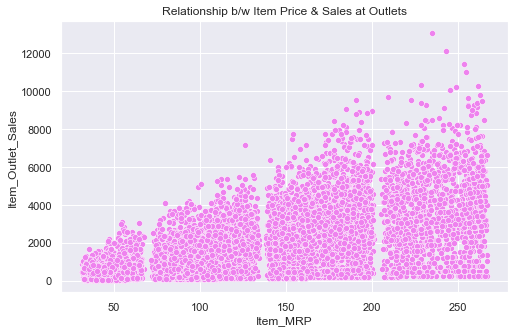

In [20]:
# Create the figure
sns.scatterplot(x=train["Item_MRP"], y=train["Item_Outlet_Sales"], color='violet')

# Add labels and title
plt.xlabel('Item_MRP')
plt.ylabel('Item_Outlet_Sales')
plt.title('Relationship b/w Item Price & Sales at Outlets')

# Show the plot
plt.show()

### 8.MISSING VALUE TREATMENT

In [21]:
# Item_Weight is a continous attribute so we will replace the missing values with mean
train["Item_Weight"] = train["Item_Weight"].fillna(train["Item_Weight"].mean())
train["Item_Weight"].isnull().sum()

0

In [22]:
# Outlet_Size is a categorial attribute so replacing the null values with mode
train["Outlet_Size"] = train["Outlet_Size"].fillna(str(train["Outlet_Size"].mode()))
train["Outlet_Size"].isnull().sum()

0

In [23]:
train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

### 9.FEATURE ENGINEERING

In [24]:
train["Item_Fat_Content"].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [25]:
# LF is Low Fat and reg is Regular so I will replace LF with Low Fat, reg Regular, low fat with Low Fat
train["Item_Fat_Content"] = train["Item_Fat_Content"].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})
train["Item_Fat_Content"].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

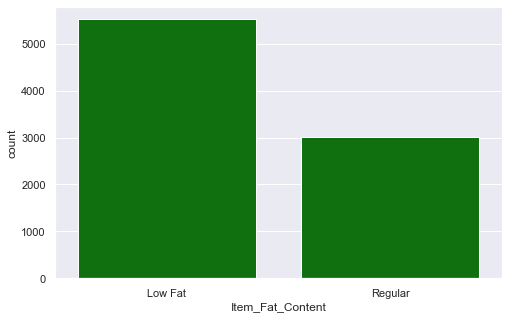

In [26]:
sns.countplot(x='Item_Fat_Content', data=train, color='green')

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='count'>

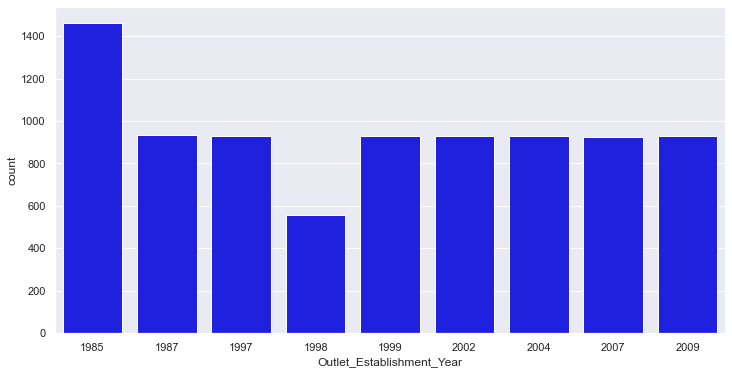

In [27]:
sns.set(rc={'figure.figsize':(12,6)})
sns.countplot(x='Outlet_Establishment_Year', data=train, color='blue')

### ENCODING CATEGORICAL VARIABLE

### 10.LABEL ENCODING:

### 11.ONE HOT ENCODING:

In [28]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
train['Item_Identifier'] = encoder.fit_transform(train["Item_Identifier"])
train['Item_Fat_Content'] = encoder.fit_transform(train["Item_Fat_Content"])
train['Item_Type'] = encoder.fit_transform(train["Item_Type"])
train['Outlet_Identifier'] = encoder.fit_transform(train["Outlet_Identifier"])
train['Outlet_Size'] = encoder.fit_transform(train["Outlet_Size"])
train['Outlet_Location_Type'] = encoder.fit_transform(train["Outlet_Location_Type"])
train['Outlet_Type'] = encoder.fit_transform(train["Outlet_Type"])

train = train.apply(encoder.fit_transform)

In [29]:
categorial_columns = train.select_dtypes(include="object").columns.tolist()

In [30]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(train[categorial_columns])
encoded_cols = list(encoder.get_feature_names(categorial_columns))
train[encoded_cols] = encoder.transform(train[categorial_columns])

In [31]:
train.isnull().sum().sum()

0

In [32]:
train.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,284,0,664,4,5592,9,4,2,0,1,2540
1,8,57,1,880,14,473,3,8,2,2,2,422
2,662,376,0,715,10,2901,9,4,2,0,1,1639
3,1121,393,1,0,6,4227,0,3,0,2,0,670
4,1297,265,0,0,9,627,1,1,1,2,1,865


### PRE-PROCESSING DATA

In [33]:
x=train
y=x.pop("Item_Outlet_Sales")

### 12.SPLITTING THE DATA INTO TRAINING DATA & TESTING DATA



In [34]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.40, random_state=1)

In [35]:
from sklearn.model_selection import train_test_split,cross_val_score

- From above analysis only Random Forest, Gradient Boost and xgboost perform well with r2 score more than 51 and mean absolute error less than 810.Though the results are not as good therefore we further try to increase the scores by Feature Selection

## 13. MODEL IMPLEMENTATION:

### 14.LINEAR REGRESSION

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [37]:
reg_lin=LinearRegression()
reg_lin.fit(x_train,y_train)
reg_lin.score(x_train,y_train)
y_preds_lin=reg_lin.predict(x_test)
rmse_lin=np.sqrt(mean_squared_error(y_preds_lin,y_test))
print('RMSE for Linear Regression:{0:.2f}'.format(rmse_lin))

RMSE for Linear Regression:631.13


In [38]:
reg_lin.score(x_train,y_train)

0.5553736788332924

In [39]:
y_preds_lin=reg_lin.predict(x_test)

In [40]:
rmse_lin=np.sqrt(mean_squared_error(y_preds_lin,y_test))
print('RMSE for Linear Regression:{0:.2f}'.format(rmse_lin))

RMSE for Linear Regression:631.13


Text(0.5, 1.0, 'Linear Regression \n RMSE: 631.13')

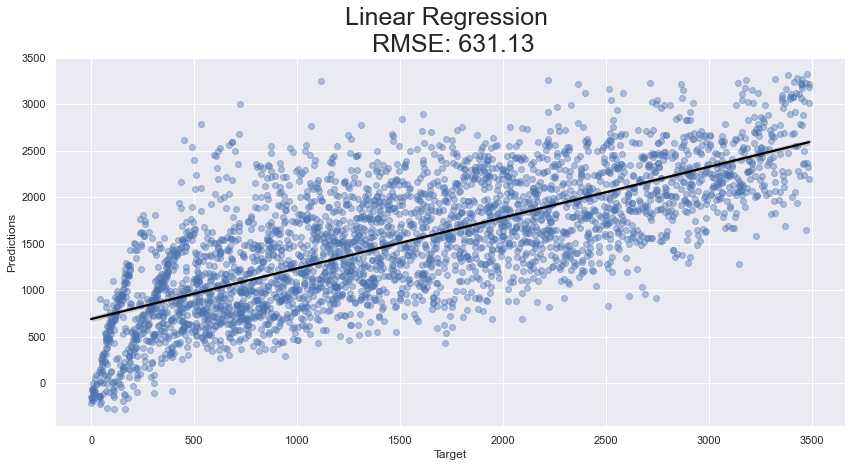

In [41]:
reg_lin_df=pd.DataFrame()
reg_lin_df['Target']=y_test
reg_lin_df['Predictions']=y_preds_lin

sns.lmplot('Target','Predictions',data=reg_lin_df,height=6,aspect=2,line_kws={'color':'black'},scatter_kws={'alpha':0.4})
plt.title('Linear Regression \n RMSE: {0:.2f}'.format(rmse_lin),size=25)

As we can see, the linear regression couldn't do a great job. The values are too scattered away from the black line which is the ideal region of the scatters. The RMSE is quite high too. Hence, it will definitely be a good option to check for regression techniques utilising a regularisation parameter such as Lasso and Ridge regression.

### 15.RIDGE REGRESSION
- We shall apply Ridge regression using a cross validation technique to prevent overfitting. We shall perform a 10 fold cross validation.

In [42]:
from sklearn.linear_model import RidgeCV

In [43]:
reg_rid=RidgeCV(cv=10)
reg_rid.fit(x_train,y_train)

RidgeCV(cv=10)

In [44]:
reg_rid.score(x_train,y_train)

0.555373598417044

In [45]:
y_preds_rid=reg_rid.predict(x_test)
rmse_rid=np.sqrt(mean_squared_error(y_preds_rid,y_test))
print('RMSE for Ridge Regression:{0:.2f}'.format(rmse_rid))

RMSE for Ridge Regression:631.14


Text(0.5, 1.0, 'Ridge Regression \n RMSE: 631.14')

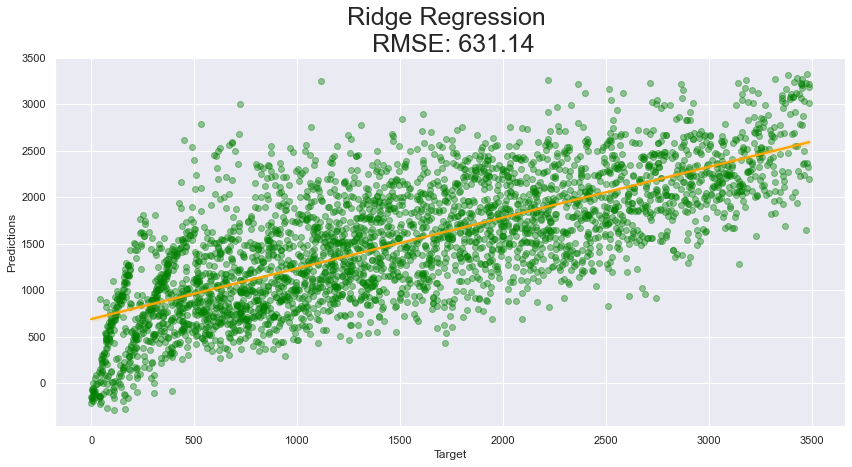

In [46]:
reg_rid_df=pd.DataFrame()
reg_rid_df['Target']=y_test
reg_rid_df['Predictions']=y_preds_rid

sns.lmplot('Target','Predictions',data=reg_rid_df,height=6,aspect=2,line_kws={'color':'orange'},scatter_kws={'alpha':0.4,'color':'green'})
plt.title('Ridge Regression \n RMSE: {0:.2f}'.format(rmse_rid),size=25)

As we can see, both linear and ridge regression have performed quite similarly with nearly identical RMSE scores.

### 16.LASSO REGRESSION
- This is another regression technique that utlises the L1 regularisation. Let us see how it performs.

In [47]:
from sklearn.linear_model import Lasso

In [48]:
reg_las=Lasso()
reg_las.fit(x_train,y_train)

Lasso()

In [49]:
reg_las.score(x_train,y_train)

0.5553423498869591

In [50]:
y_preds_las=reg_las.predict(x_test)
rmse_las=np.sqrt(mean_squared_error(y_preds_las,y_test))
print('RMSE for Lasso Regression:{0:.2f}'.format(rmse_las))

RMSE for Lasso Regression:631.30


Text(0.5, 1.0, 'Lasso Regression \n RMSE: 631.30')

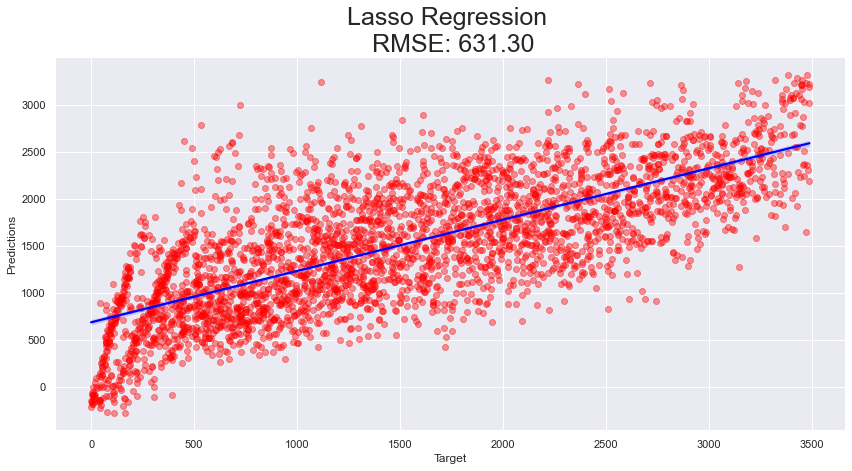

In [51]:
reg_las_df=pd.DataFrame()
reg_las_df['Target']=y_test
reg_las_df['Predictions']=y_preds_las

sns.lmplot('Target','Predictions',data=reg_las_df,height=6,aspect=2,line_kws={'color':'blue'},scatter_kws={'alpha':0.4,'color':'red'})
plt.title('Lasso Regression \n RMSE: {0:.2f}'.format(rmse_las),size=25)

- From the above, we have realised that all the regression techniques with and without regularisations have yielded similar results.

## ENSEMBLE METHODS
### 17.RANDOM FOREST REGRESSION
- Let us apply Random Forest regression using a hyperparameter tuning method called GridSearchCV where we shall change n_estimators and max_depth. We also apply a cross validation of 10.

In [52]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [53]:
rfr=RandomForestRegressor(random_state=0)
param_grid={'n_estimators':[3,4,5,7,9,10,12], 'max_depth':[5,7,9,10,12]}
grid=GridSearchCV(rfr,param_grid,scoring='r2',cv=10)

In [54]:
grid_result=grid.fit(x_train,y_train)
grid_result.best_params_

{'max_depth': 5, 'n_estimators': 9}

In [55]:
grid_result.score(x_train,y_train)

0.673277949878167

In [56]:
y_preds_rfr=grid_result.predict(x_test)
rmse_rfr=np.sqrt(mean_squared_error(y_preds_rfr,y_test))
print('RMSE for Random Forest Regression:{0:.2f}'.format(rmse_rfr))

RMSE for Random Forest Regression:548.35


Text(0.5, 1.0, 'Random Forest Regression \n RMSE: 548.35')

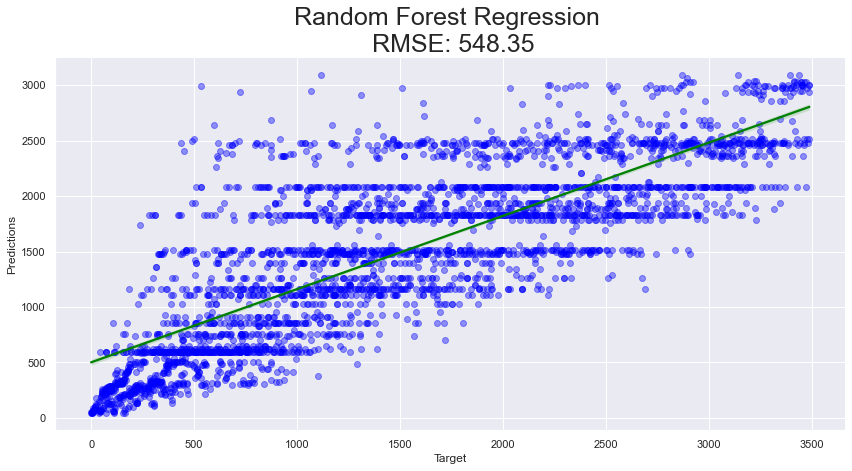

In [57]:
rfr_df=pd.DataFrame()
rfr_df['Target']=y_test
rfr_df['Predictions']=y_preds_rfr

sns.lmplot('Target','Predictions',data=rfr_df,height=6,aspect=2,line_kws={'color':'green'},scatter_kws={'alpha':0.4,'color':'blue'})
plt.title('Random Forest Regression \n RMSE: {0:.2f}'.format(rmse_rfr),size=25)

From the above RMSE, it is observed that Random Forest regression technique has done better than Linear regression techniques.

### 18.GRADIENT BOOSTING REGRESSOR

In [58]:
from sklearn.ensemble import GradientBoostingRegressor

In [59]:
gbr=GradientBoostingRegressor(random_state=0)
gbr.fit(x_train,y_train)
gbr.score(x_train,y_train)

0.6968695389141051

In [60]:
y_preds_gbr=gbr.predict(x_test)
rmse_gbr=np.sqrt(mean_squared_error(y_preds_gbr,y_test))
print('RMSE for Random Forest Regression:{0:.2f}'.format(rmse_gbr))

RMSE for Random Forest Regression:546.69


Text(0.5, 1.0, 'GBR Regression \n RMSE: 546.69')

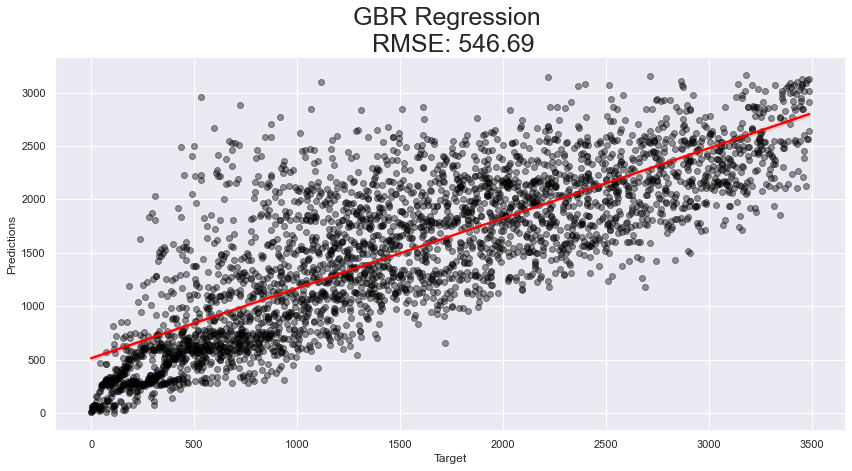

In [61]:
gbr_df=pd.DataFrame()
gbr_df['Target']=y_test
gbr_df['Predictions']=y_preds_gbr

sns.lmplot('Target','Predictions',data=gbr_df,height=6,aspect=2,line_kws={'color':'red'},scatter_kws={'alpha':0.4,'color':'black'})
plt.title('GBR Regression \n RMSE: {0:.2f}'.format(rmse_gbr),size=25)

Both Random Forest and Gradient boosted decision tree have performed quite similar when compared on basis of RMSE.



### 19.XGBOOST (EXTREME GRADIENT BOOSTING)

In [62]:
import xgboost as xgb

In [63]:
xgb_reg=xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213,
                             random_state =7, nthread = -1)

In [64]:
xgb_reg.fit(x_train,y_train)
xgb_reg.score(x_train,y_train)

0.811970789555026

In [65]:
y_preds_xgb=xgb_reg.predict(x_test)
rmse_xgb=np.sqrt(mean_squared_error(y_preds_xgb,y_test))
print('RMSE for XGBoost Regression:{0:.2f}'.format(rmse_xgb))

RMSE for XGBoost Regression:574.60


Text(0.5, 1.0, 'XGBoost Regression \n RMSE: 574.60')

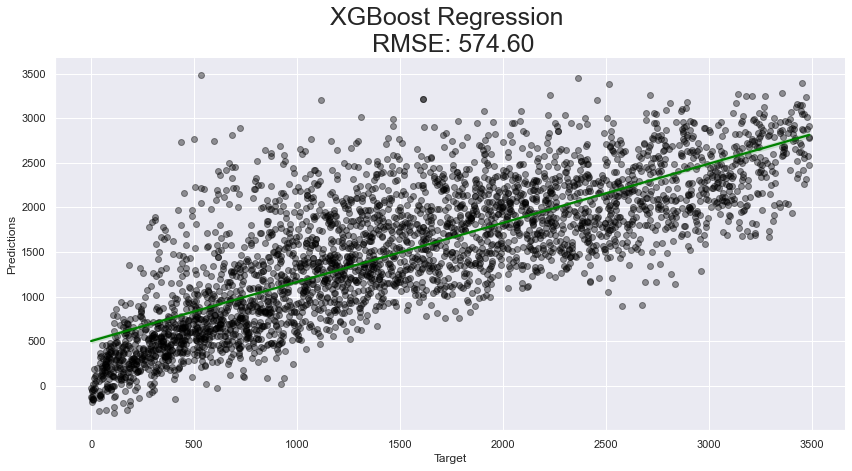

In [66]:
gbr_df=pd.DataFrame()
gbr_df['Target']=y_test
gbr_df['Predictions']=y_preds_xgb

sns.lmplot('Target','Predictions',data=gbr_df,height=6,aspect=2,line_kws={'color':'green'},scatter_kws={'alpha':0.4,'color':'black'})
plt.title('XGBoost Regression \n RMSE: {0:.2f}'.format(rmse_xgb),size=25)

XGboost perform well when compared to both Random Forest or GBDT.

### 20.FINAL PREDICTION ON THE TEST DATA OF XGBOOST

#### BUILDING A PREDICTIVE SYSTEM :

- Building a predictive system inorder to find the sales for the first product from the dataset.

In [67]:
sales_data_prediction = xgb_reg.predict(x_train)

In [68]:
input_data = (156, 9.300, 0, 0.016047, 4, 249.8092, 9, 1999,1, 0, 1)
print("The sales for the first product in the dataset is predicted as ", sales_data_prediction[0])

The sales for the first product in the dataset is predicted as  3179.64


### CONCLUSION

Thus I have built the model to predict the sales & have performed the evaluation successfully